<span style="font-size: 35px; color: red; font-weight: bold">ĐỒ ÁN 2: IMAGE PROCESSING</span>

<span style="font-size: 25px; color: yellow;">Họ và tên: Trần Trung Hiếu</span><br>
<span style="font-size: 25px; color: yellow;">Mã số sinh viên: 21127608</span>

In [45]:
#import thư viện
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import time
import random

In [46]:
def init_img(name):
    img = Image.open(name)
    return np.array(img)

def save_img(img, name, type_change):
    result=Image.fromarray(img.astype(np.uint8))
    name_img = name[:-4] + "_" + type_change + name[-4:]
    result.save(name_img)

def show_img(img_original, img_result):
    plt.figure(figsize=(12, 6))
    img_original = Image.open(img_original)
    plt.subplot(1,2, 1)
    plt.imshow(img_original)
    plt.axis('off')
    plt.title("Hình ban đầu")
    plt.subplot(1,2, 2)
    img_result=Image.fromarray(img_result.astype(np.uint8))
    plt.imshow(img_result)
    plt.axis('off')
    plt.title("Kết quả")

<span style="font-size: 20px; color: blue; font-weight: bold;">1.Thay đổi độ sáng điểm ảnh</span>

In [47]:
def brightness_change(img):
    return np.clip(img+np.mean(img), 0, 255).astype(np.uint8)

<span style="font-size: 20px; color: blue; font-weight: bold;">2.Thay đổi độ tương phản</span>

In [48]:
def contrast_change(img, kernel):
    return np.clip(img*float(kernel), 0, 255).astype(np.uint8)

<span style="font-size: 20px; color: blue; font-weight: bold;">3.Lật ảnh</span>

In [49]:
#lật ảnh dọc
def flip_vertical(img):
    return img[::-1, :, :]
#lật ảnh ngang
def flip_horizontal(img): 
    return img[:, ::-1, :]

<span style="font-size: 20px; color: blue; font-weight: bold;">4. Chuyển đổi ảnh RBG thành ảnh xám/sepia</span>

In [50]:
#hàm chuyển đổi ảnh 
def RGB_to_grayscale(img):
    result = np.array(np.dot(img, [0.3, 0.59, 0.11]))
    return result.astype(np.uint8)
def RGB_to_sepia(img):
    result = np.dot(img, np.array([[0.393, 0.769, 0.189],
                                    [0.349, 0.686, 0.168],
                                    [0.272, 0.534, 0.131]]).T)
    return np.clip(result, 0, 255).astype(np.uint8)
#hàm in ảnh xám
def show_img_gray(img_original, img_result):
    plt.figure(figsize=(12, 6))
    img_original = Image.open(img_original)
    plt.subplot(1,2, 1)
    plt.imshow(img_original)
    plt.axis('off')
    plt.title("Hình ban đầu")
    plt.subplot(1,2, 2)
    img_result=Image.fromarray(img_result.astype(np.uint8))
    plt.imshow(img_result, cmap='gray')
    plt.axis('off')
    plt.title("Kết quả")

<span style="font-size: 20px; color: blue; font-weight: bold;">5. Làm mờ/sắc nét ảnh</span>

In [51]:
#làm mờ từng pixel của ảnh
def blur_pixel(arr_pixels):
    result = np.sum(arr_pixels.reshape(-1, arr_pixels.shape[-1]), axis=0)
    return result
#làm mờ ảnh
def blur_img(img):
    result = np.empty_like(img, dtype=float)
    for i in range(1, img.shape[0] - 1):
        for j in range(1, img.shape[1] - 1):
            arr = blur_pixel(img[i-1:i+2, j-1:j+2, :])
            result[i, j] = arr
    return np.clip((result * 1/9), 0, 255).astype(np.uint8)

#làm rỗ từng pixel của ảnh
def sharpen_pixel(arr_pixels):
    arr_pixels = arr_pixels.reshape(-1, arr_pixels.shape[-1])
    kernel = np.array([[0,-1,0],
                       [-1,5,-1],
                       [0,-1,0]])
    kernel = kernel.reshape(-1, 1)
    result = np.dot(kernel.T, arr_pixels).reshape(-1)
    return np.clip(result, 0, 255).astype(np.uint8)
#làm rõ ảnh
def sharpen_img(img):
    result = np.empty_like(img, dtype=float)
    for i in range(1, img.shape[0] - 1):
        for j in range(1, img.shape[1] - 1):
            arr = sharpen_pixel(img[i-1:i+2, j-1:j+2, :])
            result[i, j] = arr
    return np.clip(result, 0, 255).astype(np.uint8)
    

<span style="font-size: 20px; color: blue; font-weight: bold;">6. Cắt ảnh theo kích thước (cắt ở trung tâm)</span>

In [52]:
def cut_img(img):    
    img_space = img.shape
    length = 100
    center = np.array([(img_space[0]//2), (img_space[1]//2)])
    result = (img[center[0]-length:center[0]+length, center[1]-length:center[1]+length, :])
    return result.astype(np.uint8)

<span style="font-size: 20px; color: blue; font-weight: bold;">7. Cắt ảnh theo khung tròn</span>

In [53]:
def circle(x, y, R):
    R_calcul = (x-R)**2 + (y-R)**2
    return R_calcul <= R**2
def cut_circle_img(img):
    img_space = img.shape
    R1 = img_space[0]//2
    R2 = img_space[1]//2
    R = min(R1, R2)
    x, y = np.ogrid[:img_space[0], :img_space[1]]
    mask = circle(x, y, R)
    img[~mask] = 0
    return img.astype(np.uint8)

<span style="font-size: 20px; color: blue; font-weight: bold;">8. Cắt ảnh theo khung là 2 hình elip</span>

In [54]:
def check_ellipse(x, y, a, b):
    return ((x/a)**2)+((y/b)**2) <=1

#thực hiện thay đổi tọa độ điểm từ trục tọa độ từ Oxy thành trục tọa độ là 2 đường chéo của hình vuông
def rotate_ellipse(x, y, theta):
    x_new = x * np.cos(theta) - y * np.sin(theta)
    y_new = x * np.sin(theta) + y * np.cos(theta)
    return x_new, y_new
def ellipse_img(img):
    img_space = img.shape
    theta1 = np.deg2rad(45)
    theta2 = np.deg2rad(-45)
    R = img_space[0]//2
    a = 7*R//4 * np.cos(theta1)
    b = R * np.sin(theta1)
    x, y = np.ogrid[:img_space[0], :img_space[1]]
    x_new1, y_new1 = rotate_ellipse(x-R, y-R, theta1)
    x_new2, y_new2 = rotate_ellipse(x-R, y-R, theta2)
    mask = check_ellipse(x_new1, y_new1, b, a)
    mask2 =  check_ellipse(x_new2, y_new2, b, a)
    img[~(mask|mask2)] = 0
    return img.astype(np.uint8)


<span style="font-size: 20px; color: blue; font-weight: bold;">HÀM MAIN</span>

Thời gian thay đổi độ sáng cho ảnh là: 0.008095026016235352
Thời gian thay đổi độ tương phản cho ảnh là: 0.007916927337646484
Thời gian lật ảnh ngang là: 0.0
Thời gian lật ảnh dọc là: 0.0
Thời gian chuyển ảnh RGB thành xám là: 0.0
Thời gian chuyển ảnh RGB thành sepia là: 0.016023635864257812
Thời gian làm mờ ảnh là: 3.3811464309692383
Thời gian làm sắc nét ảnh là: 3.655500888824463
Thời gian cắt ảnh (cắt ở trung tâm) là: 0.0
Thời gian cắt ảnh theo khung tròn là: 0.0
Thời gian cắt ảnh theo khung ellipse là: 0.008035659790039062


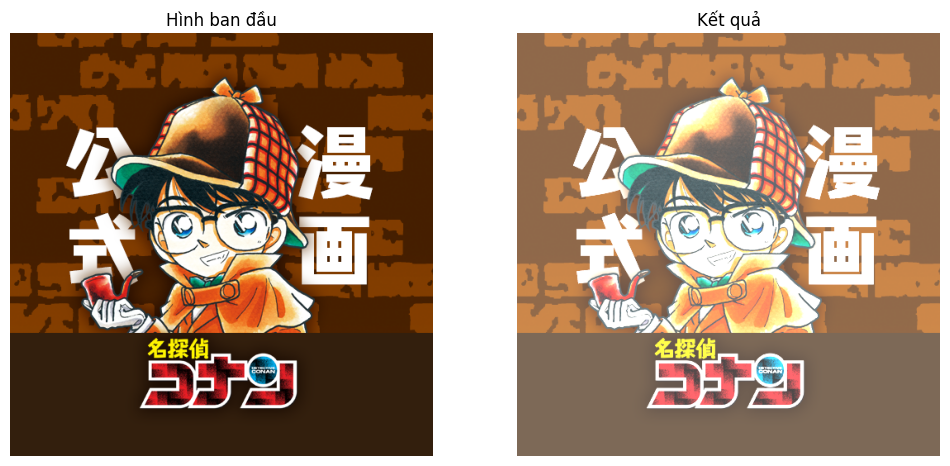

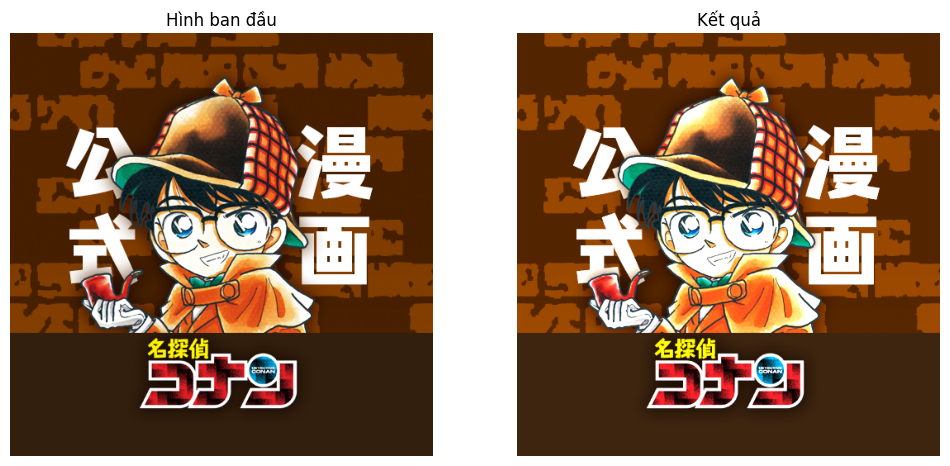

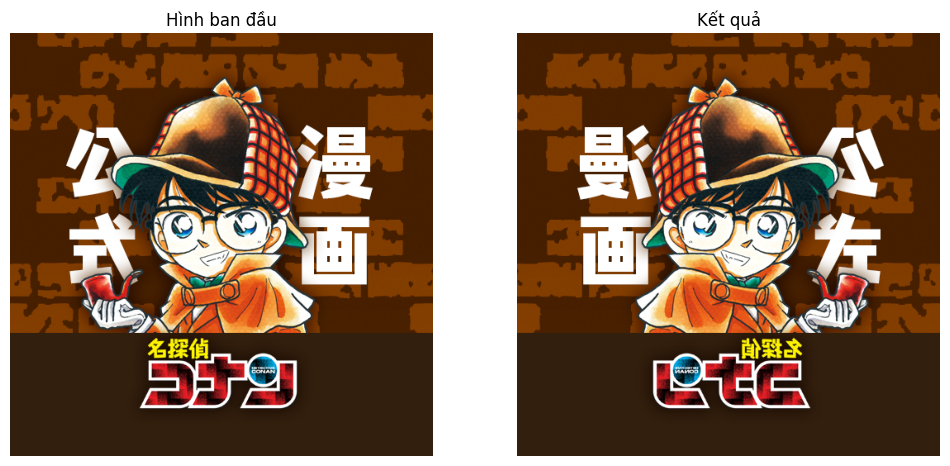

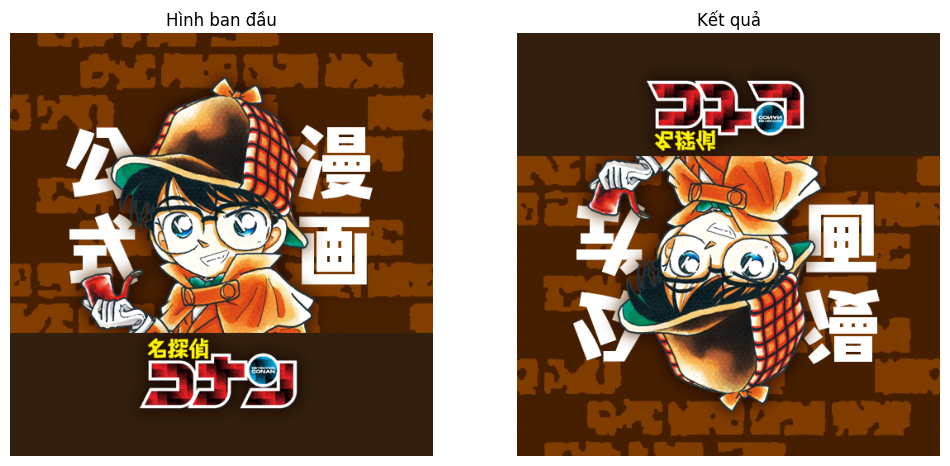

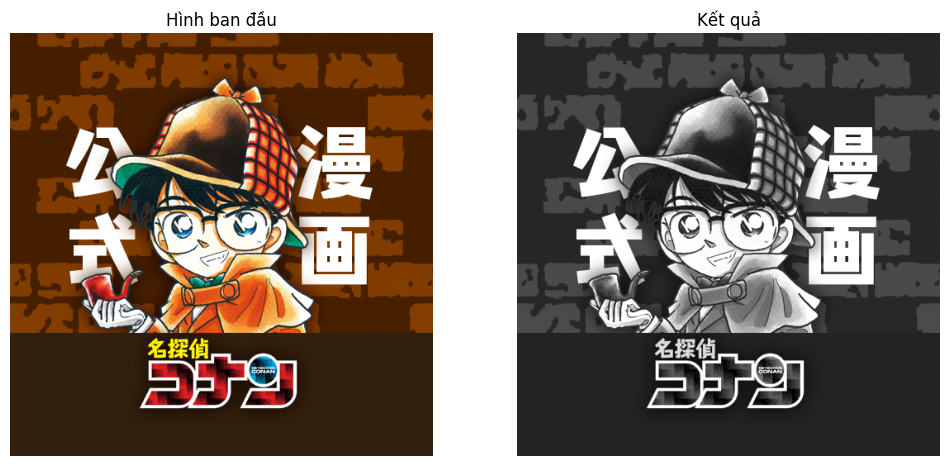

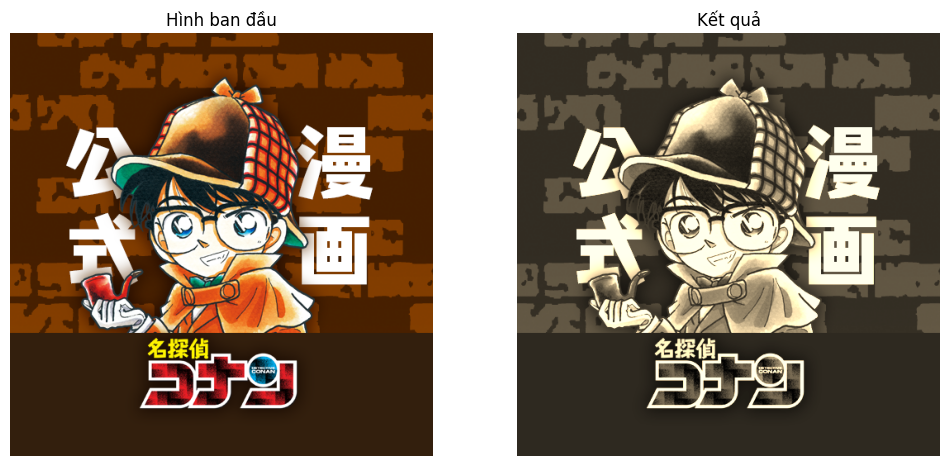

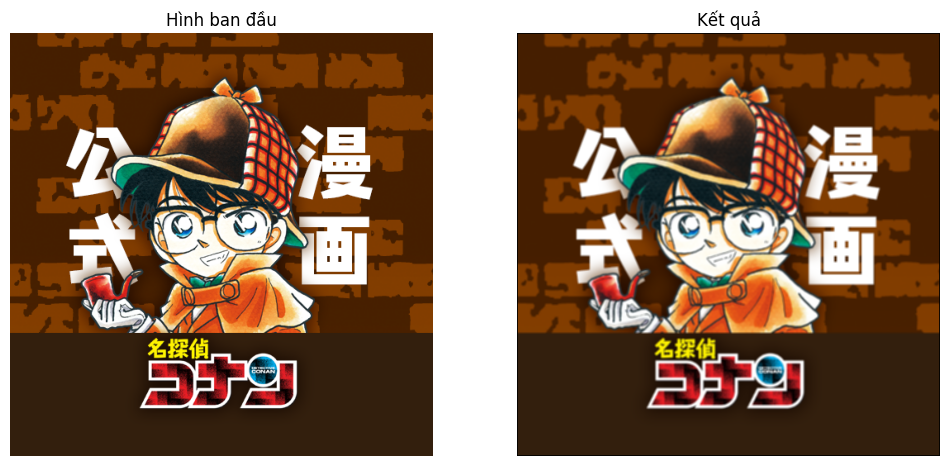

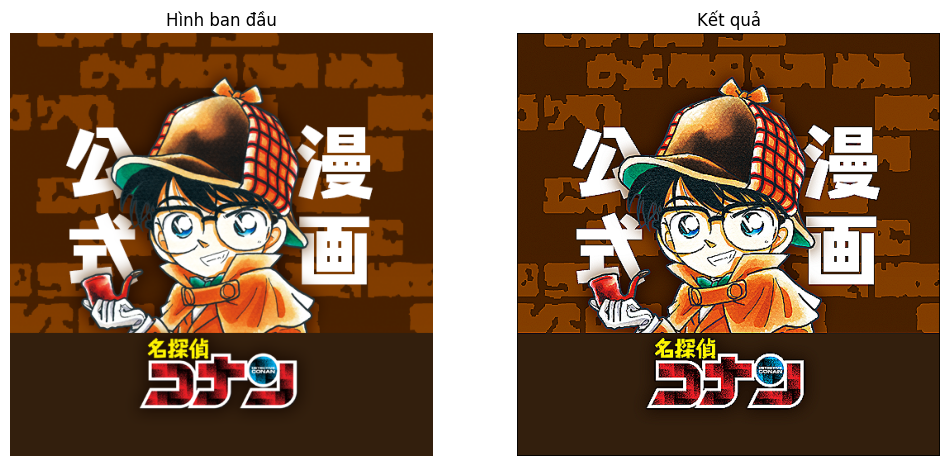

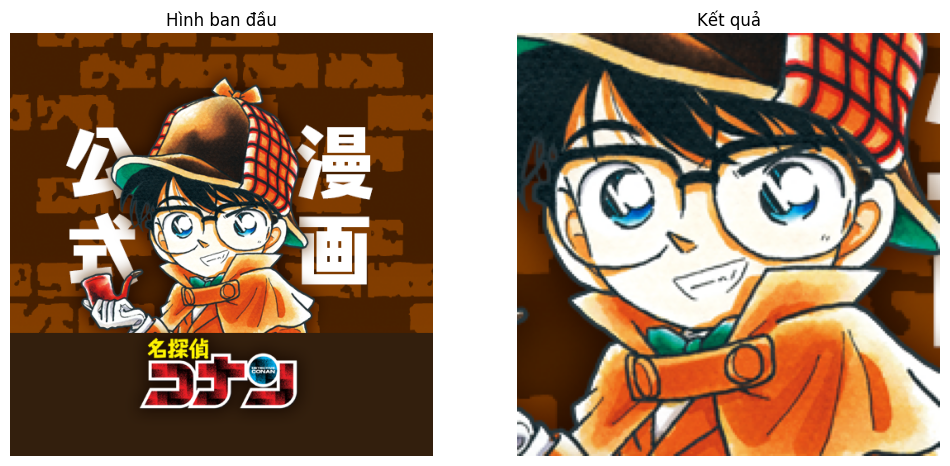

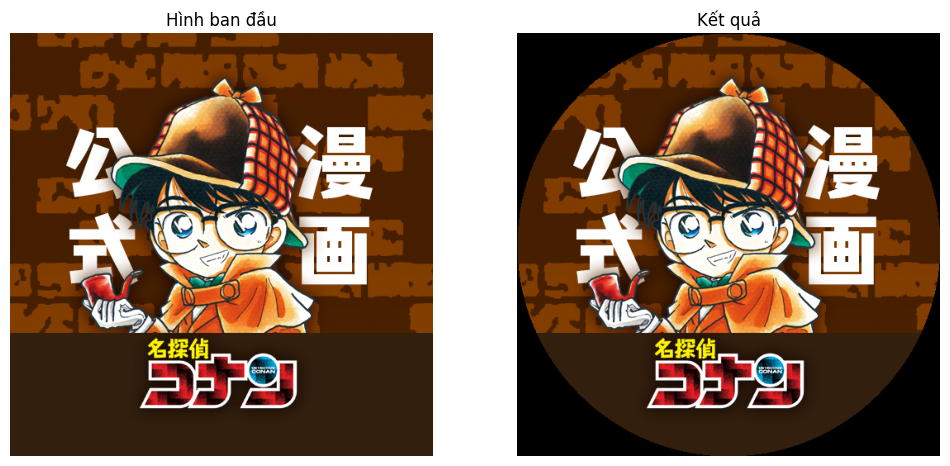

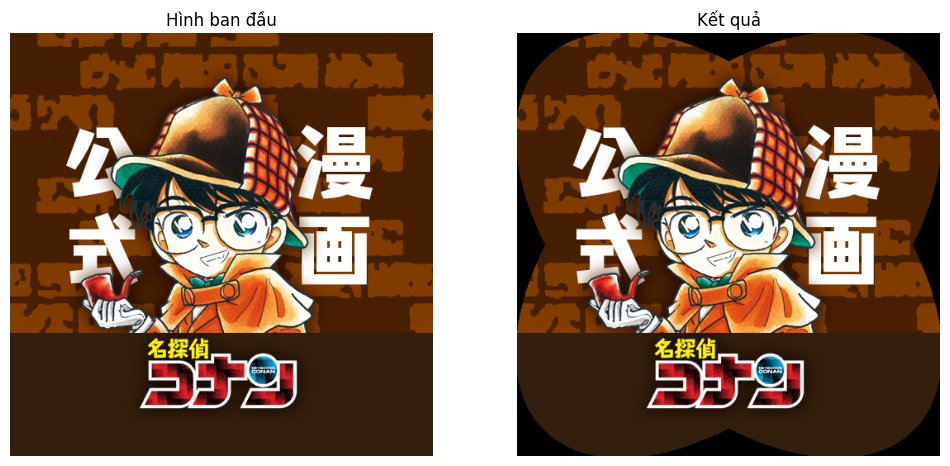

In [55]:
def main():
    name = input("Nhập tên ảnh (ảnh phải có ba kênh màu R,G,B): ")
    while(True):    
        choice = int(input("Nhập lựa chọn mong muốn:\n0.Tất cả chế độ.\n1.Thay đổi độ sáng cho ảnh.\n2.Thay đổi độ tương phản.\n3.Lật ảnh (ngang/dọc).\n4.Chuyển đổi ảnh RGB thành ảnh xám/sepia.\n5.Làm mờ/sắc nét ảnh.\n6.Cắt ảnh theo kích thước(cắt ở trung tâm).\n7.Cắt ảnh theo khung hình tròn.\n8.Cắt ảnh theo 2 hình elip."))
        if choice >=0 and choice <=8:
            break
    img = init_img(name)
    if choice == 0:
        start_time = time.time()
        result = brightness_change(img.copy())
        end_time = time.time()
        print(f"Thời gian thay đổi độ sáng cho ảnh là: {end_time - start_time}")
        show_img(name, result)
        save_img(result, name, "brightness")


        start_time = time.time()
        result = contrast_change(img.copy(), 1.2)
        end_time = time.time()
        print(f"Thời gian thay đổi độ tương phản cho ảnh là: {end_time - start_time}")
        show_img(name, result)
        save_img(result, name, "contrast")

        start_time = time.time()
        result = flip_horizontal(img.copy())
        end_time = time.time()
        print(f"Thời gian lật ảnh ngang là: {end_time - start_time}")
        show_img(name, result)
        save_img(result, name, "horizontal")
        
        start_time = time.time()
        result = flip_vertical(img.copy())
        end_time = time.time()
        print(f"Thời gian lật ảnh dọc là: {end_time - start_time}")
        show_img(name, result)
        save_img(result, name, "vertical")

        start_time = time.time()
        result = RGB_to_grayscale(img.copy())
        end_time = time.time()
        print(f"Thời gian chuyển ảnh RGB thành xám là: {end_time - start_time}")
        show_img_gray(name, result)
        save_img(result, name, "grayscale")
        
        start_time = time.time()
        result = RGB_to_sepia(img.copy())
        end_time = time.time()
        print(f"Thời gian chuyển ảnh RGB thành sepia là: {end_time - start_time}")
        show_img(name, result)
        save_img(result, name, "sepia")

        start_time = time.time()
        result = blur_img(img.copy())
        end_time = time.time()
        print(f"Thời gian làm mờ ảnh là: {end_time - start_time}")
        show_img(name, result)
        save_img(result, name, "blur")
        
        start_time = time.time()
        result = sharpen_img(img.copy())
        end_time = time.time()
        print(f"Thời gian làm sắc nét ảnh là: {end_time - start_time}")
        show_img(name, result)
        save_img(result, name, "sharpen")

        start_time = time.time()
        result = cut_img(img.copy())
        end_time = time.time()
        print(f"Thời gian cắt ảnh (cắt ở trung tâm) là: {end_time - start_time}")
        show_img(name, result)
        save_img(result, name, "cut_img")

        start_time = time.time()
        result = cut_circle_img(img.copy())
        end_time = time.time()
        print(f"Thời gian cắt ảnh theo khung tròn là: {end_time - start_time}")
        show_img(name, result)
        save_img(result, name, "cut_circle_img")

        start_time = time.time()
        result = ellipse_img(img.copy())
        end_time = time.time()
        print(f"Thời gian cắt ảnh theo khung ellipse là: {end_time - start_time}")
        show_img(name, result)
        save_img(result, name, "ellipse_img")
    elif choice == 1:
        start_time = time.time()
        result = brightness_change(img.copy())
        end_time = time.time()
        print(f"Thời gian thay đổi độ sáng cho ảnh là: {end_time - start_time}")
        show_img(name, result)
        save_img(result, name, "brightness")
    elif choice == 2:
        start_time = time.time()
        result = contrast_change(img.copy(), 1.2)
        end_time = time.time()
        print(f"Thời gian thay đổi độ tương phản cho ảnh là: {end_time - start_time}")
        show_img(name, result)
        save_img(result, name, "contrast")
    elif choice == 3:
        start_time = time.time()
        result = flip_horizontal(img.copy())
        end_time = time.time()
        print(f"Thời gian lật ảnh ngang là: {end_time - start_time}")
        show_img(name, result)
        save_img(result, name, "horizontal")

        start_time = time.time()
        result = flip_vertical(img.copy())
        end_time = time.time()
        print(f"Thời gian lật ảnh dọc là: {end_time - start_time}")
        show_img(name, result)
        save_img(result, name, "vertical")
    elif choice == 4:
        start_time = time.time()
        result = RGB_to_grayscale(img.copy())
        end_time = time.time()
        print(f"Thời gian chuyển ảnh RGB thành xám là: {end_time - start_time}")
        show_img_gray(name, result)
        save_img(result, name, "grayscale")

        start_time = time.time()
        result = RGB_to_sepia(img.copy())
        end_time = time.time()
        print(f"Thời gian chuyển ảnh RGB thành sepia là: {end_time - start_time}")
        show_img(name, result)

        save_img(result, name, "sepia")
    elif choice == 5:
        start_time = time.time()
        result = blur_img(img.copy())
        end_time = time.time()
        print(f"Thời gian làm mờ ảnh là: {end_time - start_time}")

        show_img(name, result)
        save_img(result, name, "blur")
        start_time = time.time()
        result = sharpen_img(img.copy())
        end_time = time.time()
        print(f"Thời gian làm sắc nét ảnh là: {end_time - start_time}")

        show_img(name, result)
        save_img(result, name, "sharpen")
    elif choice == 6:
        start_time = time.time()
        result = cut_img(img.copy())
        end_time = time.time()
        print(f"Thời gian cắt ảnh (cắt ở trung tâm) là: {end_time - start_time}")

        show_img(name, result)
        save_img(result, name, "cut_img")
    elif choice == 7:
        start_time = time.time()
        result = cut_circle_img(img.copy())
        end_time = time.time()
        print(f"Thời gian cắt ảnh theo khung tròn là: {end_time - start_time}")

        show_img(name, result)
        save_img(result, name, "cut_circle_img")
    elif choice == 8:
        start_time = time.time()
        result = ellipse_img(img.copy())
        end_time = time.time()
        print(f"Thời gian cắt ảnh theo khung ellipse là: {end_time - start_time}")

        show_img(name, result)
        save_img(result, name, "ellipse_img")

main()